In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [6]:
toyo = pd.read_csv(r"C:\Users\Kajal\OneDrive\Documents\toyoto_file.csv",encoding='latin-1')

In [7]:
toyo.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [8]:
## EDA
toyo.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

In [9]:
toyo.memory_usage().head()

Index          128
Id           11488
Model        11488
Price        11488
Age_08_04    11488
dtype: int64

In [10]:
toyo.loc[:,['Fuel_Type','Price']].head(3)

,Fuel_Type,Price
0,Diesel,13500
1,Diesel,13750
2,Diesel,13950


In [11]:
toyo.dtypes.value_counts()

int64     35
object     3
dtype: int64

In [12]:
toyo.select_dtypes(exclude = [object]).head(3) 

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,13500,23,10,2002,46986,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,2,13750,23,10,2002,72937,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90,1,0,2000,...,0,0,1,0,0,0,1,0,0,0


In [13]:
toyo.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [14]:
print(np.unique(toyo['Doors']))
print(np.unique(toyo['cc']))
print(np.unique(toyo['Automatic']))

[2 3 4 5]
[ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]
[0 1]


In [15]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [16]:
toyo['Met_Color'] = toyo['Met_Color'].astype('object')
toyo['Automatic'] = toyo['Automatic'].astype('object')

In [17]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   object
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   object
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [18]:
toyo.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [19]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
toyo.drop(columns_to_drop, axis = 1, inplace= True)
toyo.sample(5)

,Id,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Weight
636,640,10500,61,123000,Diesel,72,0,Blue,0,2000,5,1135
1357,1364,7900,76,60000,Petrol,110,0,Green,0,1600,3,1050
331,333,13950,35,32941,Petrol,110,1,Yellow,0,1600,5,1080
1034,1039,10500,68,26698,Petrol,110,0,Red,0,1600,3,1055
227,229,11690,34,65345,Petrol,97,1,Red,0,1400,5,1060


In [20]:
toyo.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.00,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.00,1070.0,1085.00,1615.0


In [21]:
toyo.rename(columns = {'Age_08_04':'Age_Months', 'cc':'CC'}, inplace = True)
toyo.sample(2)

,Id,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Doors,Weight
977,982,8900,63,46000,Petrol,86,0,Green,0,1300,5,1035
443,446,11950,54,75231,Petrol,110,1,Grey,0,1600,5,1080


In [22]:
toyo.insert(10, "Price_Class", " ")

In [23]:
for i in range(0, len(toyo['Price']), 1):
    if toyo['Price'].iloc[i] <= 8450:
        toyo["Price_Class"].iloc[i] = 'Cheap'
    elif toyo['Price'].iloc[i] >= 11950:
         toyo["Price_Class"].iloc[i] = 'Expensive'
    else:
        toyo['Price_Class'].iloc[i] = 'Average'

C:\Users\Kajal\AppData\Local\Temp\ipykernel_36664\4259654997.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyo["Price_Class"].iloc[i] = 'Expensive'
C:\Users\Kajal\AppData\Local\Temp\ipykernel_36664\4259654997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyo["Price_Class"].iloc[i] = 'Cheap'
C:\Users\Kajal\AppData\Local\Temp\ipykernel_36664\4259654997.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyo['Price_Class'].

In [24]:
toyo.insert(11, "Age", " ")

In [26]:
toyo.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1436.0,721.555014,416.476890,1.0,361.75,721.5,1081.25,1442.0
Price,1436.0,10730.824513,3626.964585,4350.0,8450.00,9900.0,11950.00,32500.0
Age_Months,1436.0,55.947075,18.599988,1.0,44.00,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.00,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.00,110.0,110.00,192.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.00,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.00,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.00,1070.0,1085.00,1615.0


In [27]:
i = 0
while i < len(toyo['Age_Months']):
    if toyo['Age_Months'].iloc[i] <= 44:
        toyo['Age'].iloc[i] = 'New Model'
        
    elif toyo['Age_Months'].iloc[i] >= 70:
        toyo['Age'].iloc[i] = 'Very Old'
               
    else:
        toyo['Age'].iloc[i] = 'Old'
    i+=1           

C:\Users\Kajal\AppData\Local\Temp\ipykernel_36664\229612329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyo['Age'].iloc[i] = 'New Model'
C:\Users\Kajal\AppData\Local\Temp\ipykernel_36664\229612329.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyo['Age'].iloc[i] = 'Old'
C:\Users\Kajal\AppData\Local\Temp\ipykernel_36664\229612329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toyo['Age'].iloc[i] = 'Very Old'


In [28]:
toyo['Age'].value_counts()

Old          689
New Model    378
Very Old     369
Name: Age, dtype: int64

In [29]:
toyo['Price_Class'].value_counts()

Average      704
Cheap        369
Expensive    363
Name: Price_Class, dtype: int64

In [30]:
toyo.head()

,Id,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Price_Class,Age,Doors,Weight
0,1,13500,23,46986,Diesel,90,1,Blue,0,2000,Expensive,New Model,3,1165
1,2,13750,23,72937,Diesel,90,1,Silver,0,2000,Expensive,New Model,3,1165
2,3,13950,24,41711,Diesel,90,1,Blue,0,2000,Expensive,New Model,3,1165
3,4,14950,26,48000,Diesel,90,0,Black,0,2000,Expensive,New Model,3,1165
4,5,13750,30,38500,Diesel,90,0,Black,0,2000,Expensive,New Model,3,1170


In [31]:
toyo.insert(12, "Age-Year",0)

In [32]:
toyo.insert(12, 'KM/Month', 0)

In [33]:
toyo.head()

,Id,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Price_Class,Age,KM/Month,Age-Year,Doors,Weight
0,1,13500,23,46986,Diesel,90,1,Blue,0,2000,Expensive,New Model,0,0,3,1165
1,2,13750,23,72937,Diesel,90,1,Silver,0,2000,Expensive,New Model,0,0,3,1165
2,3,13950,24,41711,Diesel,90,1,Blue,0,2000,Expensive,New Model,0,0,3,1165
3,4,14950,26,48000,Diesel,90,0,Black,0,2000,Expensive,New Model,0,0,3,1165
4,5,13750,30,38500,Diesel,90,0,Black,0,2000,Expensive,New Model,0,0,3,1170


In [34]:
def conversion(val1, val2):
    val_con = val1/12
    ratio   = val2/val1
    return [val_con, ratio]

In [36]:
toyo['Age-Year'], toyo['KM/Month'] = conversion(toyo['Age_Months'], toyo['KM'])

In [37]:
toyo.sample(5)

,Id,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Price_Class,Age,KM/Month,Age-Year,Doors,Weight
471,474,9750,56,65400,Petrol,97,1,Silver,0,1400,Average,Old,1167.857143,4.666667,3,1025
78,79,16895,29,22575,Petrol,110,1,Grey,0,1600,Expensive,New Model,778.448276,2.416667,5,1115
757,761,9500,68,80121,Petrol,110,0,Red,0,1600,Average,Old,1178.250000,5.666667,5,1070
1434,1441,7250,70,16916,Petrol,86,1,Grey,0,1300,Cheap,Very Old,241.657143,5.833333,3,1015
130,132,16250,20,32627,Petrol,97,1,Grey,0,1400,Expensive,New Model,1631.350000,1.666667,5,1110


In [39]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           1436 non-null   int64  
 1   Price        1436 non-null   int64  
 2   Age_Months   1436 non-null   int64  
 3   KM           1436 non-null   int64  
 4   Fuel_Type    1436 non-null   object 
 5   HP           1436 non-null   int64  
 6   Met_Color    1436 non-null   object 
 7   Color        1436 non-null   object 
 8   Automatic    1436 non-null   object 
 9   CC           1436 non-null   int64  
 10  Price_Class  1436 non-null   object 
 11  Age          1436 non-null   object 
 12  KM/Month     1436 non-null   float64
 13  Age-Year     1436 non-null   float64
 14  Doors        1436 non-null   int64  
 15  Weight       1436 non-null   int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 179.6+ KB


In [40]:
pd.crosstab(index = toyo['Fuel_Type'], columns = 'count', dropna = True)

col_0,count
Fuel_Type,
CNG,17
Diesel,155
Petrol,1264


In [41]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'], dropna = True)  #two-way table

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,16,155,1185
1,1,0,79


In [42]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'], normalize = True, dropna = True)  
#two-way table, joint-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011142,0.107939,0.825209
1,0.000696,0.000000,0.055014


In [43]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'],margins = True, normalize = True, dropna = True)
#two-way table, marginal probability

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011142,0.107939,0.825209,0.94429
1,0.000696,0.000000,0.055014,0.05571
All,0.011838,0.107939,0.880223,1.00000


In [44]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'],margins = True, normalize = 'index', dropna = True)
#two-way-conditional-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011799,0.114307,0.873894
1,0.012500,0.000000,0.987500
All,0.011838,0.107939,0.880223


In [45]:
pd.crosstab(index = toyo['Automatic'], columns = toyo['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.941176,1.0,0.9375,0.94429
1,0.058824,0.0,0.0625,0.05571


In [46]:
numerical_data = toyo.select_dtypes(exclude = [object])
print(numerical_data.shape)

(1436, 10)


In [47]:
corr_matrix = numerical_data.corr()
corr_matrix

,Id,Price,Age_Months,KM,HP,CC,KM/Month,Age-Year,Doors,Weight
Id,1.000000,-0.738250,0.906132,0.273298,-0.109375,-0.117704,-0.302098,0.906132,-0.130207,-0.414500
Price,-0.738250,1.000000,-0.876590,-0.569960,0.314990,0.126389,-0.023369,-0.876590,0.185326,0.581198
Age_Months,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.125711,1.000000,-0.148359,-0.470253
KM,0.273298,-0.569960,0.505672,1.000000,-0.333538,0.102683,0.724024,0.505672,-0.036197,-0.028598
HP,-0.109375,0.314990,-0.156622,-0.333538,1.000000,0.035856,-0.260631,-0.156622,0.092424,0.089614
CC,-0.117704,0.126389,-0.098084,0.102683,0.035856,1.000000,0.175403,-0.098084,0.079903,0.335637
KM/Month,-0.302098,-0.023369,-0.125711,0.724024,-0.260631,0.175403,1.000000,-0.125711,0.049075,0.324752
Age-Year,0.906132,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.125711,1.000000,-0.148359,-0.470253
Doors,-0.130207,0.185326,-0.148359,-0.036197,0.092424,0.079903,0.049075,-0.148359,1.000000,0.302618
Weight,-0.414500,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.324752,-0.470253,0.302618,1.000000


In [48]:
import matplotlib.pyplot as plt

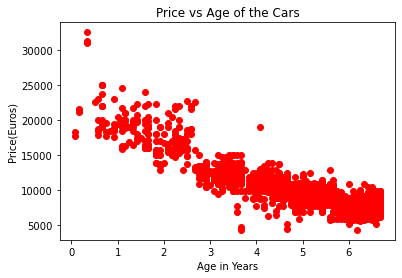

In [49]:
plt.scatter(toyo['Age-Year'], toyo['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

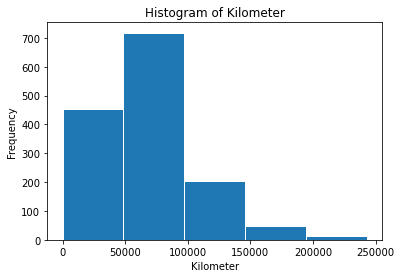

In [50]:
plt.hist(toyo['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:title={'center':'Bar plot of Fuel Type'}, xlabel='Frequency', ylabel='Fuel Type'>

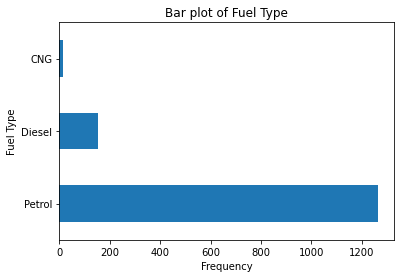

In [51]:
fuel_count = pd.value_counts(toyo['Fuel_Type'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.title('Bar plot of Fuel Type')
fuel_count.plot.barh()

In [53]:
toyo.head()

,Id,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Color,Automatic,CC,Price_Class,Age,KM/Month,Age-Year,Doors,Weight
0,1,13500,23,46986,Diesel,90,1,Blue,0,2000,Expensive,New Model,2042.869565,1.916667,3,1165
1,2,13750,23,72937,Diesel,90,1,Silver,0,2000,Expensive,New Model,3171.173913,1.916667,3,1165
2,3,13950,24,41711,Diesel,90,1,Blue,0,2000,Expensive,New Model,1737.958333,2.000000,3,1165
3,4,14950,26,48000,Diesel,90,0,Black,0,2000,Expensive,New Model,1846.153846,2.166667,3,1165
4,5,13750,30,38500,Diesel,90,0,Black,0,2000,Expensive,New Model,1283.333333,2.500000,3,1170


<AxesSubplot:xlabel='Age-Year', ylabel='Price'>

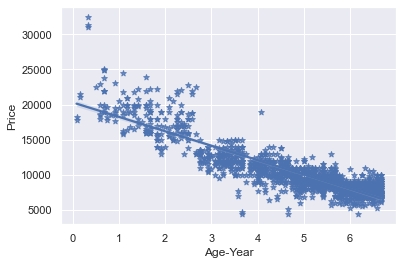

In [54]:
sns.set(style = 'darkgrid')
sns.regplot(x = toyo['Age-Year'], y = toyo['Price'], marker = '*')

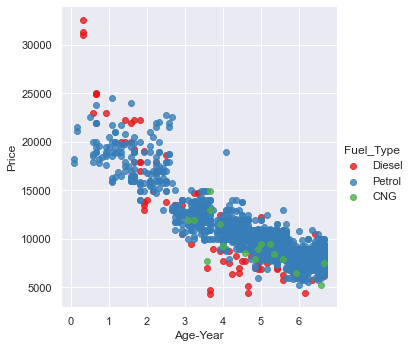

In [55]:
sns.lmplot(x = 'Age-Year', y = 'Price', data = toyo, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')

C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age_Months'>

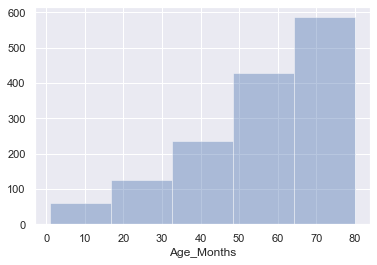

In [56]:
sns.distplot(toyo['Age_Months'], kde = False, bins = 5)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

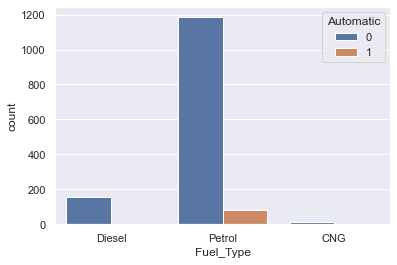

In [57]:
sns.countplot(x = 'Fuel_Type', data = toyo, hue = 'Automatic')

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

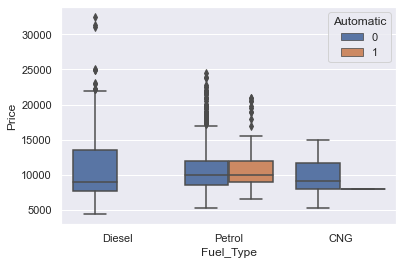

In [59]:
sns.boxplot(y = toyo['Price'], x = toyo['Fuel_Type'], hue = toyo['Automatic'])

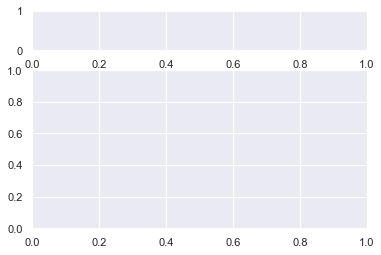

In [60]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})

C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

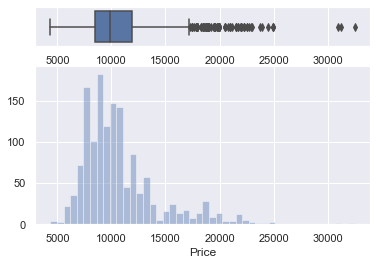

In [61]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(toyo['Price'], ax = ax_box)
sns.distplot(toyo['Price'], ax = ax_hist, kde = False)

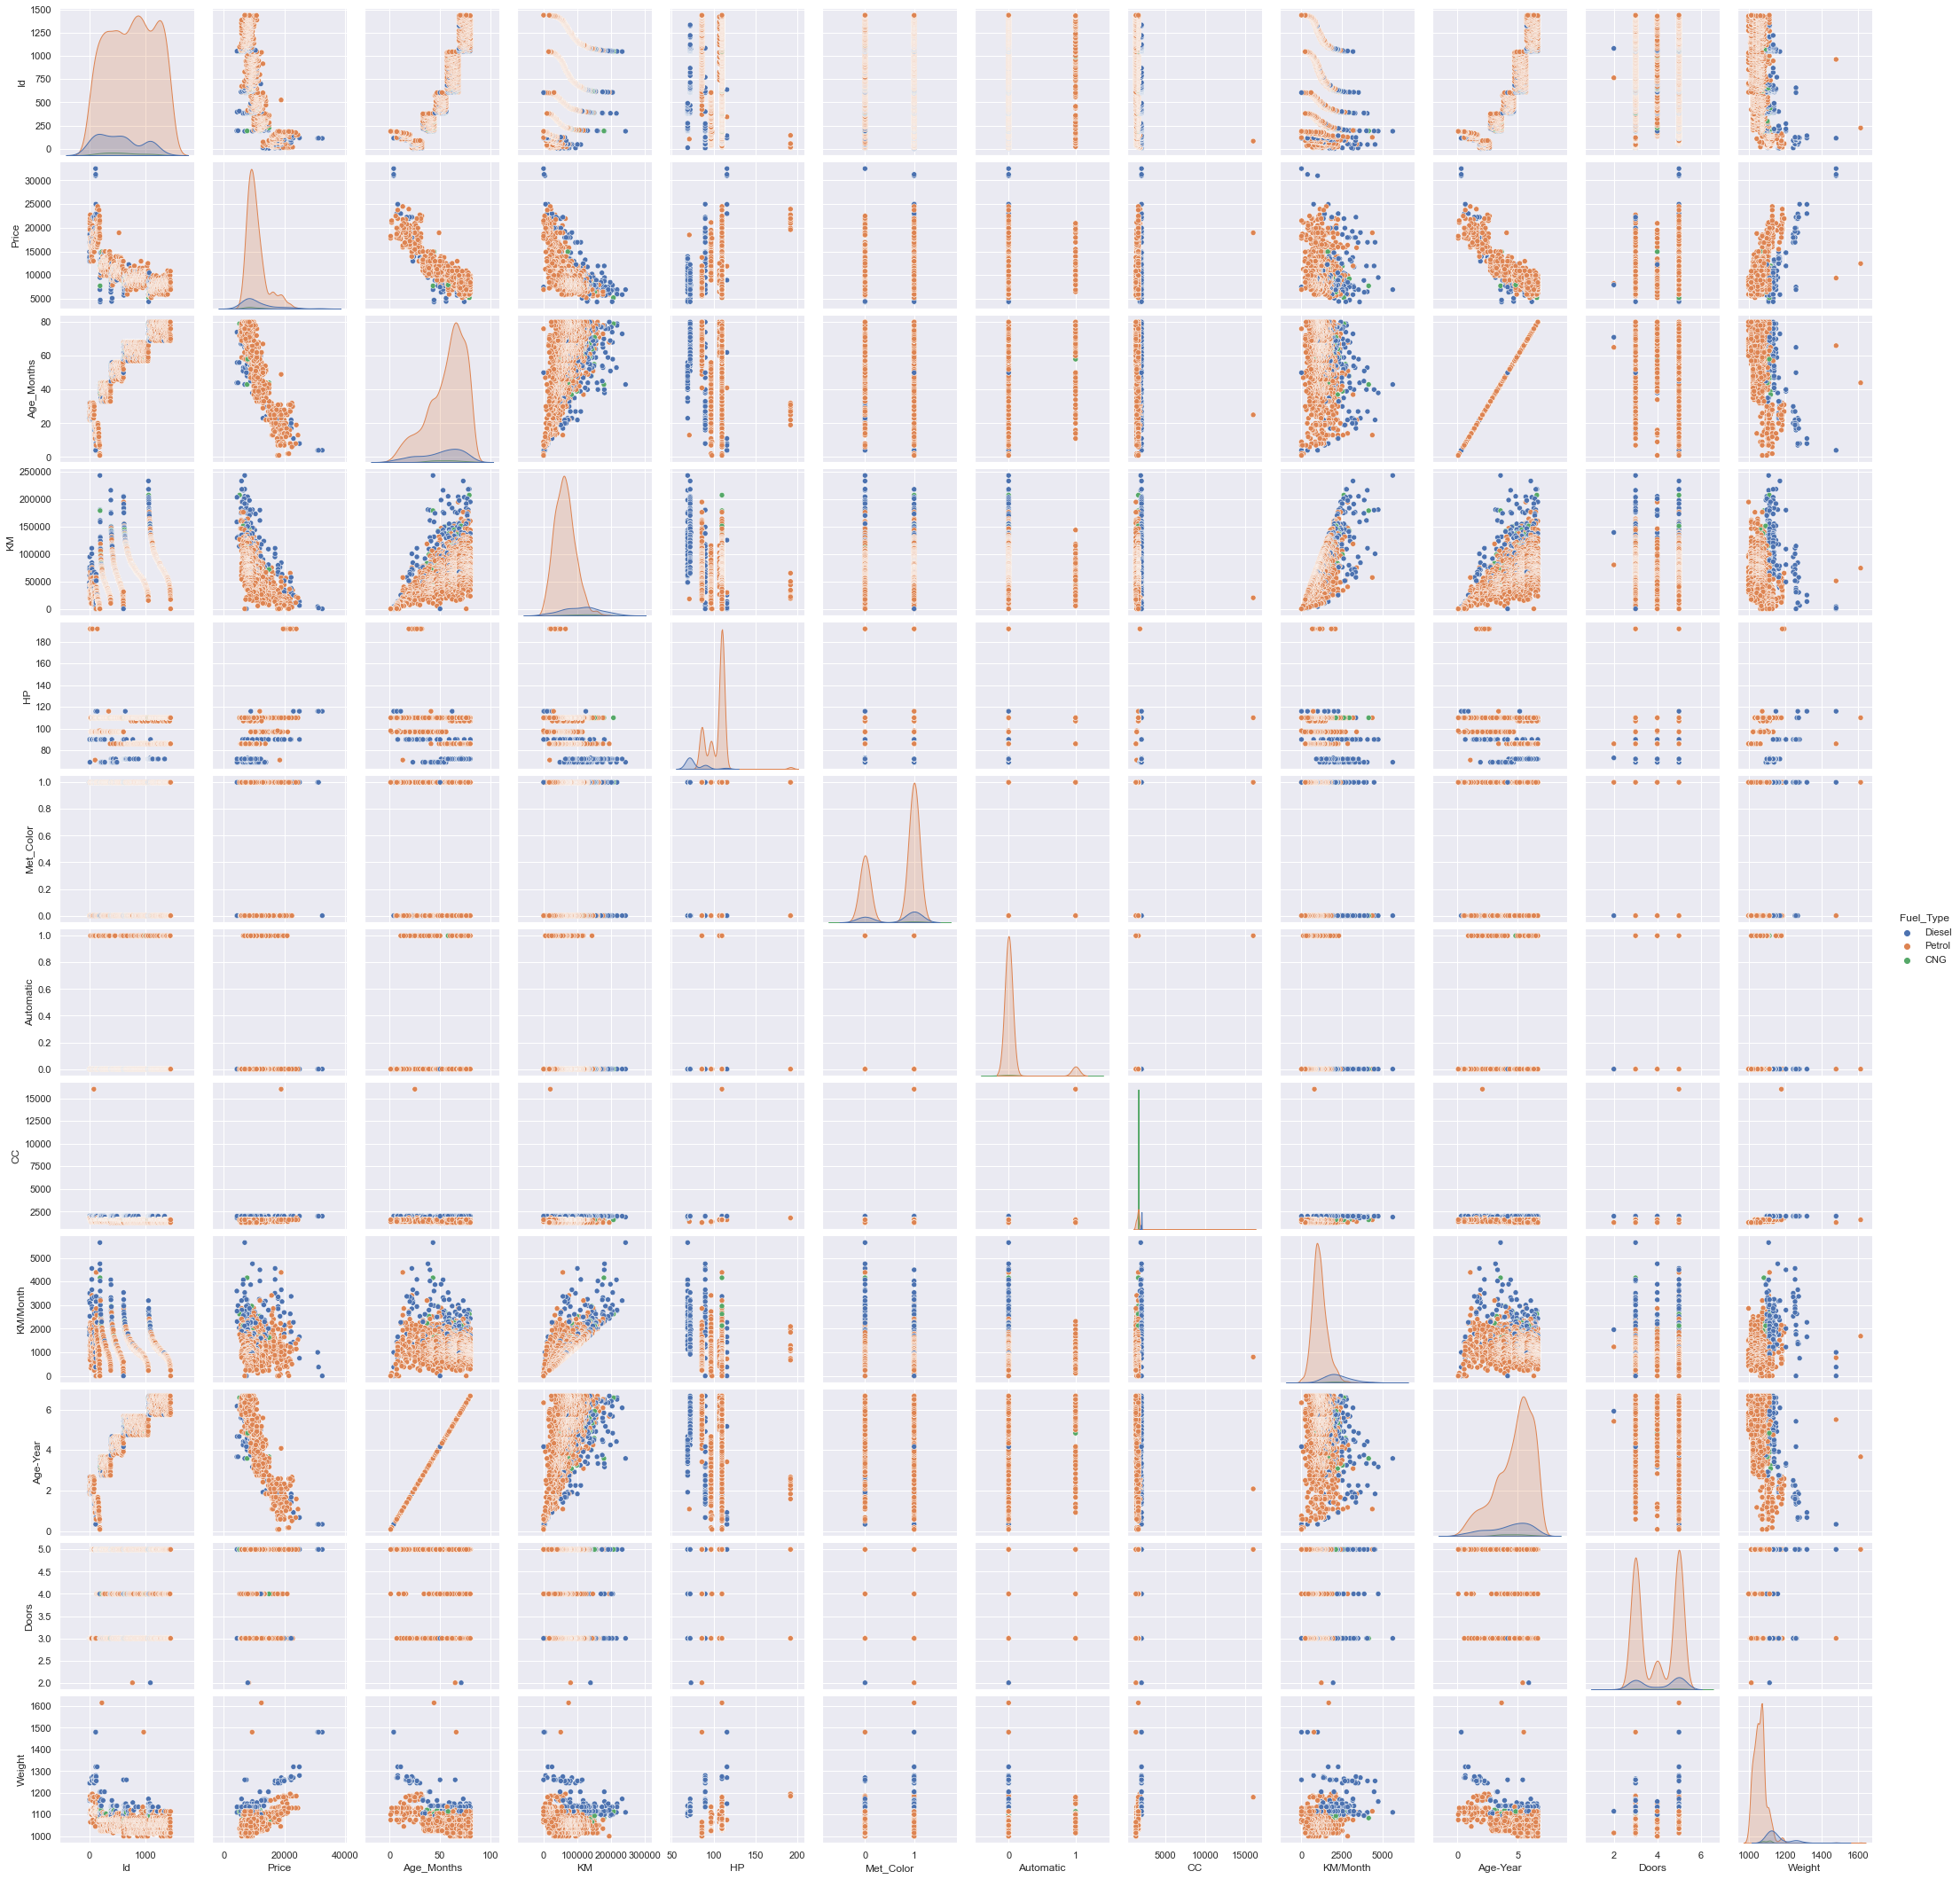

In [62]:
sns.pairplot(toyo, kind = 'scatter', hue = 'Fuel_Type')